In [49]:
    #Final Projct: Fish Data
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys
#!{sys.executable} -m pip install selenium
df = pd.read_csv(r"C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-201 Data Wrangling/fishdata_csv3.csv", encoding= 'unicode_escape')
df

,Year,Month,Day,Hour,Minute,Second,Carbon_monoxide,Internal_temperature,External_temperature,Humidity,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,2020.0,6.0,18,14,30.0,43.0,-183.0,25.0,29.0,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,6.0,18,14,30.0,48.0,-175.0,25.0,29.0,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,6.0,18,14,31.0,3.0,-175.0,25.0,29.0,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,6.0,18,14,31.0,8.0,-175.0,25.0,29.0,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.0,6.0,18,14,31.0,13.0,-171.0,25.0,29.0,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811941,2020.0,10.0,19,8,24.0,4.0,NaN,-165.0,25.0,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811942,2020.0,10.0,19,8,24.0,8.0,NaN,-167.0,25.0,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811943,2020.0,10.0,19,8,24.0,13.0,NaN,25.0,95.0,25.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811944,2020.0,10.0,19,8,24.0,16.0,NaN,-169.0,25.0,95.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Data Cleaning
    # Remove unused rows
df = df.drop(df[(df['Unnamed: 12'] <= 0) | (df['Unnamed: 12'] > 0)].index)

    # Remove unused columns
df = df.dropna(axis=1, how="all")

    # Drop duplicates
df = df.drop_duplicates()

    # Remove rows with invalid data (I'll assume data outside the given range are invalid data)
        # pH
df = df.drop(df[(df['pH'] > 14) | (df['pH'] < 0)].index)

        # Year
df = df.drop(df[(df['Year'] < 1800) | (df['Year'] > 2030)].index)   

        # Carbon monoxide
df = df.drop(df[(df['Carbon_monoxide'] <= 0)].index)   

        # Internal temperature
df = df.drop(df[(df['Internal_temperature'] < 10) | (df['Internal_temperature'] > 50)].index)   

        # External temperature
df = df.drop(df[(df['External_temperature'] < 10) | (df['External_temperature'] > 50)].index)   

        # Month
df = df.drop(df[(df['Month'] > 12) | (df['Month'] < 0)].index)   

        # Day
df = df.drop(df[(df['Day'] > 31) | (df['Day'] < 0)].index)   
        
    # Replace NaN with avergae value
df = df.fillna(df.mean())

    # Add Date, Time, and Datetime columns
df["Month"] = df["Month"].astype(int)
df["Year"] = df["Year"].astype(int)
df["Date"] = df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-" + df["Day"].astype(str)

df["Minute"] = df["Minute"].astype(int)
df["Second"] = df["Second"].astype(int)
df["Time"] = df["Hour"].astype(str) + ":" + df["Minute"].astype(str) + ":" + df["Second"].astype(str)

df["Datetime"] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df

,Year,Month,Day,Hour,Minute,Second,Carbon_monoxide,Internal_temperature,External_temperature,Humidity,Light_intensity,pH,Date,Time,Datetime
8313,2020,6,19,5,31,51,8.0,35.000000,31.000000,95.0,29.620000,4.180000,2020-6-19,5:31:51,2020-06-19 05:31:51
8314,2020,6,19,5,31,56,8.0,36.000000,31.000000,95.0,29.620000,4.180000,2020-6-19,5:31:56,2020-06-19 05:31:56
8315,2020,6,19,5,32,1,8.0,36.000000,31.000000,95.0,29.620000,4.170000,2020-6-19,5:32:1,2020-06-19 05:32:01
8316,2020,6,19,5,32,11,8.0,35.000000,31.000000,95.0,29.620000,4.180000,2020-6-19,5:32:11,2020-06-19 05:32:11
8317,2020,6,19,5,32,16,8.0,35.000000,31.000000,95.0,29.620000,4.210000,2020-6-19,5:32:16,2020-06-19 05:32:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625254,2020,8,14,11,13,11,256.0,34.000000,30.000000,95.0,26.870000,4.150000,2020-8-14,11:13:11,2020-08-14 11:13:11
625255,2020,8,14,11,13,16,256.0,35.000000,30.000000,95.0,26.870000,4.160000,2020-8-14,11:13:16,2020-08-14 11:13:16
625256,2020,8,14,11,13,19,256.0,35.000000,30.000000,95.0,26.810000,4.140000,2020-8-14,11:13:19,2020-08-14 11:13:19
625569,2020,8,18,15,34,11,257.0,31.070735,29.898698,95.0,27.440246,3.969158,2020-8-18,15:34:11,2020-08-18 15:34:11


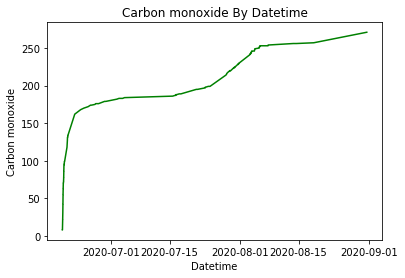

In [69]:
plt.plot(df['Datetime'], df['Carbon_monoxide'], color='g')
plt.xlabel('Datetime')
plt.ylabel('Carbon monoxide')
plt.title('Carbon monoxide By Datetime')
plt.show()

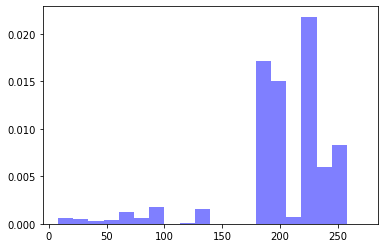

In [70]:
plt.hist(df['Carbon_monoxide'], 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [71]:
df['Carbon_monoxide'].describe()

count    91789.000000
mean       201.583251
std         45.682985
min          8.000000
25%        189.000000
50%        199.000000
75%        228.000000
max        271.000000
Name: Carbon_monoxide, dtype: float64

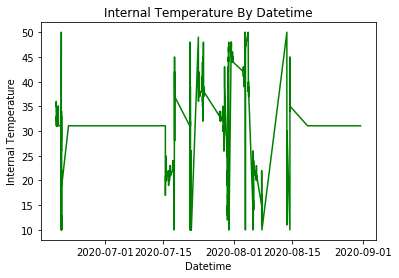

In [72]:
plt.plot(df['Datetime'], df['Internal_temperature'], color='g')
plt.xlabel('Datetime')
plt.ylabel('Internal Temperature')
plt.title('Internal Temperature By Datetime')
plt.show()

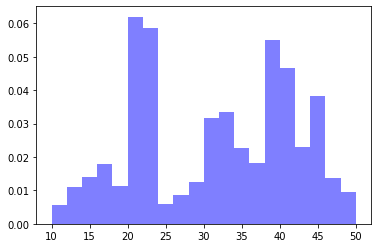

In [73]:
plt.hist(df['Internal_temperature'], 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [74]:
df['Internal_temperature'].describe()

count    91789.000000
mean        31.070735
std         10.171529
min         10.000000
25%         22.000000
50%         32.000000
75%         40.000000
max         50.000000
Name: Internal_temperature, dtype: float64

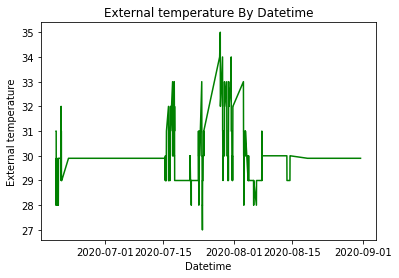

In [75]:
plt.plot(df['Datetime'], df['External_temperature'], color='g')
plt.xlabel('Datetime')
plt.ylabel('External temperature')
plt.title('External temperature By Datetime')
plt.show()

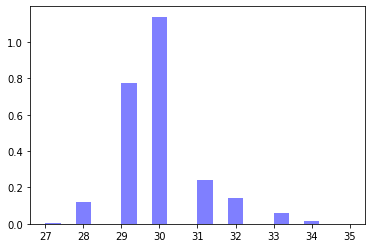

In [76]:
plt.hist(df['External_temperature'], 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [77]:
df['External_temperature'].describe()

count    91789.000000
mean        29.898698
std          1.080619
min         27.000000
25%         29.000000
50%         30.000000
75%         30.000000
max         35.000000
Name: External_temperature, dtype: float64

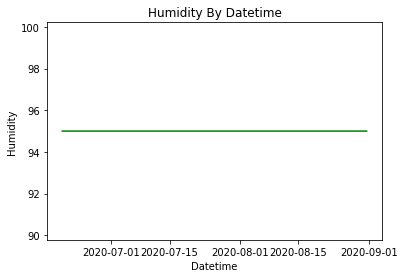

In [78]:
plt.plot(df['Datetime'], df['Humidity'], color='g')
plt.xlabel('Datetime')
plt.ylabel('Humidity')
plt.title('Humidity By Datetime')
plt.show()

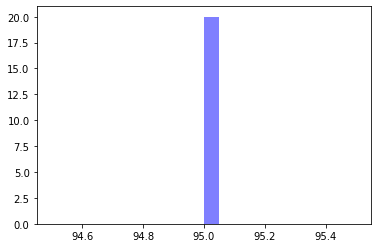

In [79]:
plt.hist(df['Humidity'], 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [80]:
df['Humidity'].describe()

count    91789.0
mean        95.0
std          0.0
min         95.0
25%         95.0
50%         95.0
75%         95.0
max         95.0
Name: Humidity, dtype: float64

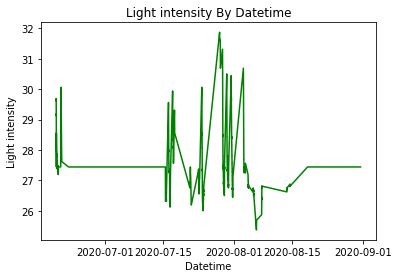

In [81]:
plt.plot(df['Datetime'], df['Light_intensity'], color='g')
plt.xlabel('Datetime')
plt.ylabel('Light intensity')
plt.title('Light intensity By Datetime')
plt.show()

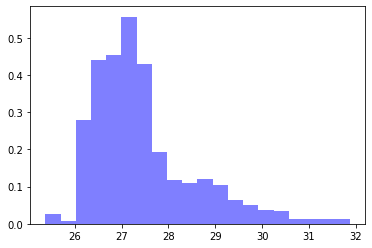

In [82]:
plt.hist(df['Light_intensity'], 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [83]:
df['Light_intensity'].describe()

count    91789.000000
mean        27.440246
std          1.092311
min         25.370000
25%         26.690000
50%         27.310000
75%         27.810000
max         31.870000
Name: Light_intensity, dtype: float64

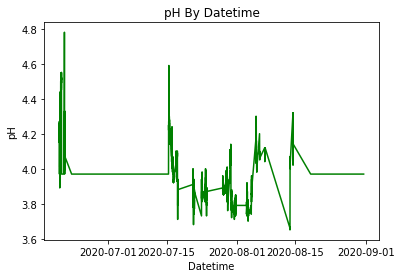

In [84]:
plt.plot(df['Datetime'], df['pH'], color='g')
plt.xlabel('Datetime')
plt.ylabel('pH')
plt.title('pH By Datetime')
plt.show()

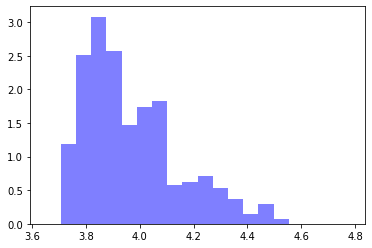

In [85]:
plt.hist(df['pH'], 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [86]:
df['pH'].describe()

count    91789.000000
mean         3.969158
std          0.177635
min          3.650000
25%          3.830000
50%          3.920000
75%          4.060000
max          4.780000
Name: pH, dtype: float64